<a href="https://colab.research.google.com/github/ChrisLouis9913/Chris-Louis/blob/main/Perceptron_Activation_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ============================================================
# Assignment: Perceptron & Activation Functions
# ============================================================
---

## Instructions:
- This assignment contains **two parts**.
- Fill in all code and explanation sections where indicated.
- Do NOT use high-level ML libraries like TensorFlow or PyTorch for implementation.
- You may use NumPy, Matplotlib, and scikit-learn for dataset generation and visualization.
---

## Implement dataset preparation

### Subtask:
Generate a 2D dataset using `make_blobs`, convert labels, and visualize it using a scatter plot.


**Reasoning**:
The first step is to generate the dataset, convert the labels, and visualize it as requested in the instructions.



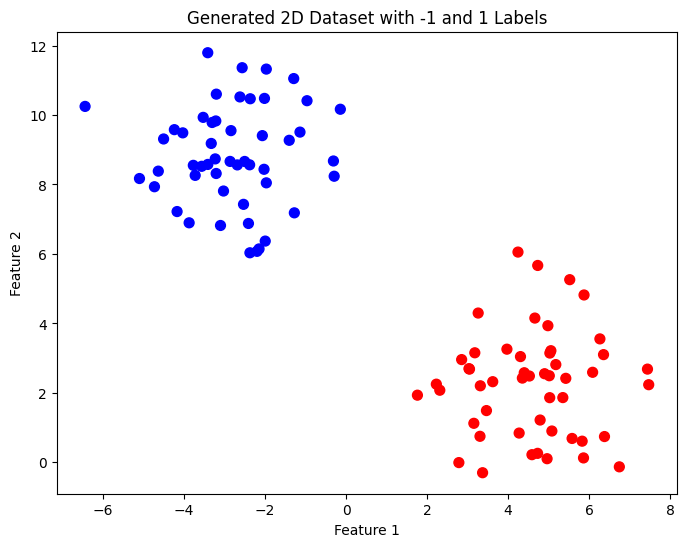

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# Generate dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=1.5, random_state=42)

# Convert labels from 0/1 to -1/1
y = np.where(y == 0, -1, 1)

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=50)
plt.title('Generated 2D Dataset with -1 and 1 Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Implement perceptron class

### Subtask:
Create the `Perceptron` class with `__init__`, `fit`, and `predict` methods.


**Reasoning**:
Implement the Perceptron class with the specified methods: `__init__`, `fit`, and `predict`.



In [2]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=100):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.n_epochs):
            for i in range(n_samples):
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_hat = np.where(linear_output >= 0, 1, -1)

                update = self.learning_rate * (y[i] - y_hat)
                self.weights += update * X[i]
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, -1)

## Train perceptron

### Subtask:
Train the implemented `Perceptron` on the generated dataset and display the final weights and bias.


**Reasoning**:
Instantiate the Perceptron class, train it on the dataset, and print the final weights and bias.



In [3]:
# Instantiate the Perceptron
perceptron = Perceptron(learning_rate=0.01, n_epochs=100)

# Train the Perceptron
perceptron.fit(X, y)

# Display the final weights and bias
print("Final Weights:", perceptron.weights)
print("Final Bias:", perceptron.bias)

Final Weights: [ 0.18984829 -0.1036385 ]
Final Bias: 0.0


## Implement decision boundary plotting

### Subtask:
Create a function to plot the decision boundary of the trained perceptron and visualize it with the dataset.


**Reasoning**:
Implement the function to plot the decision boundary of the trained perceptron and visualize it with the dataset.



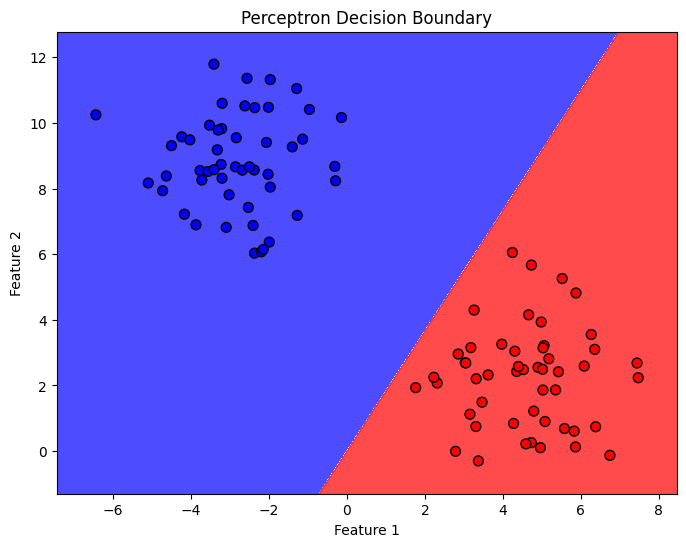

In [4]:
def plot_decision_boundary(perceptron, X, y):
    # Determine the range of the features
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a meshgrid of points
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Flatten the meshgrid and make predictions
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = perceptron.predict(grid_points)

    # Reshape the predictions
    Z = Z.reshape(xx.shape)

    # Plot the contour of the predictions
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.8)

    # Plot the original data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=50, edgecolors='k')

    # Add title and labels
    plt.title('Perceptron Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Call the function to plot the decision boundary
plot_decision_boundary(perceptron, X, y)

## Explain decision boundary

### Subtask:
Write a brief explanation of how the perceptron separates the classes based on the decision boundary.


**Reasoning**:
Write the explanation for how the perceptron separates the classes based on the decision boundary.



In [5]:
# Explanation (2–3 sentences):
# The decision boundary is a line that separates the two classes in the feature space.
# Points on one side of this line are classified by the perceptron as belonging to one class (e.g., 1),
# while points on the other side are classified as belonging to the other class (e.g., -1).
# The position and orientation of this line are determined by the learned weights and bias of the perceptron.


## Implement activation functions

### Subtask:
Implement the Sigmoid, Tanh, ReLU, Leaky ReLU, and Softmax activation functions and their derivatives.


**Reasoning**:
Implement the Sigmoid, Tanh, ReLU, Leaky ReLU, and Softmax activation functions and their derivatives as Python functions.



In [6]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(output):
    return output * (1 - output)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(output):
    return 1 - output**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(output):
    return np.where(output > 0, 1, 0)

def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

def leaky_relu_derivative(output, alpha=0.01):
    return np.where(output > 0, 1, alpha)

def softmax(x):
    # Subtract max for numerical stability
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=-1, keepdims=True)

# For the derivative of softmax, we implement the common case for a single output in backpropagation
# where it's treated as softmax_output * (1 - softmax_output).
# Note: This is a simplification and not the full Jacobian matrix derivative.
def softmax_derivative(output):
    return output * (1 - output)

## Test activation functions

### Subtask:
Apply the implemented activation functions to the input values `[-2, -1, 0, 1, 2]` and record the outputs in a table.


**Reasoning**:
Apply the implemented activation functions to the specified input values and store the results in a dictionary for easy access and printing in a table format.



In [7]:
# Input values
inputs = np.array([-2, -1, 0, 1, 2])

# Apply each activation function
sigmoid_outputs = sigmoid(inputs)
tanh_outputs = tanh(inputs)
relu_outputs = relu(inputs)
leaky_relu_outputs = leaky_relu(inputs)
softmax_outputs = softmax(inputs) # Softmax expects an array, so inputs works directly

# Organize the results into a dictionary
results = {
    'Input': inputs,
    'Sigmoid': sigmoid_outputs,
    'Tanh': tanh_outputs,
    'ReLU': relu_outputs,
    'Leaky ReLU': leaky_relu_outputs,
    'Softmax': softmax_outputs
}

# Print the results in a table format
print("Input | Sigmoid | Tanh | ReLU | Leaky ReLU | Softmax")
print("------|---------|------|------|------------|---------")
for i in range(len(inputs)):
    print(f"{results['Input'][i]:<5} | {results['Sigmoid'][i]:<7.4f} | {results['Tanh'][i]:<4.4f} | {results['ReLU'][i]:<4} | {results['Leaky ReLU'][i]:<10} | {results['Softmax'][i]:<7.4f}")

Input | Sigmoid | Tanh | ReLU | Leaky ReLU | Softmax
------|---------|------|------|------------|---------
-2    | 0.1192  | -0.9640 | 0    | -0.02      | 0.0117 
-1    | 0.2689  | -0.7616 | 0    | -0.01      | 0.0317 
0     | 0.5000  | 0.0000 | 0    | 0.0        | 0.0861 
1     | 0.7311  | 0.7616 | 1    | 1.0        | 0.2341 
2     | 0.8808  | 0.9640 | 2    | 2.0        | 0.6364 


## Visualize activation functions

### Subtask:
Plot each activation function for the input range `[-5, 5]` and visualize them.


**Reasoning**:
Generate the input range, calculate the outputs for each activation function, and plot each function in a separate figure.



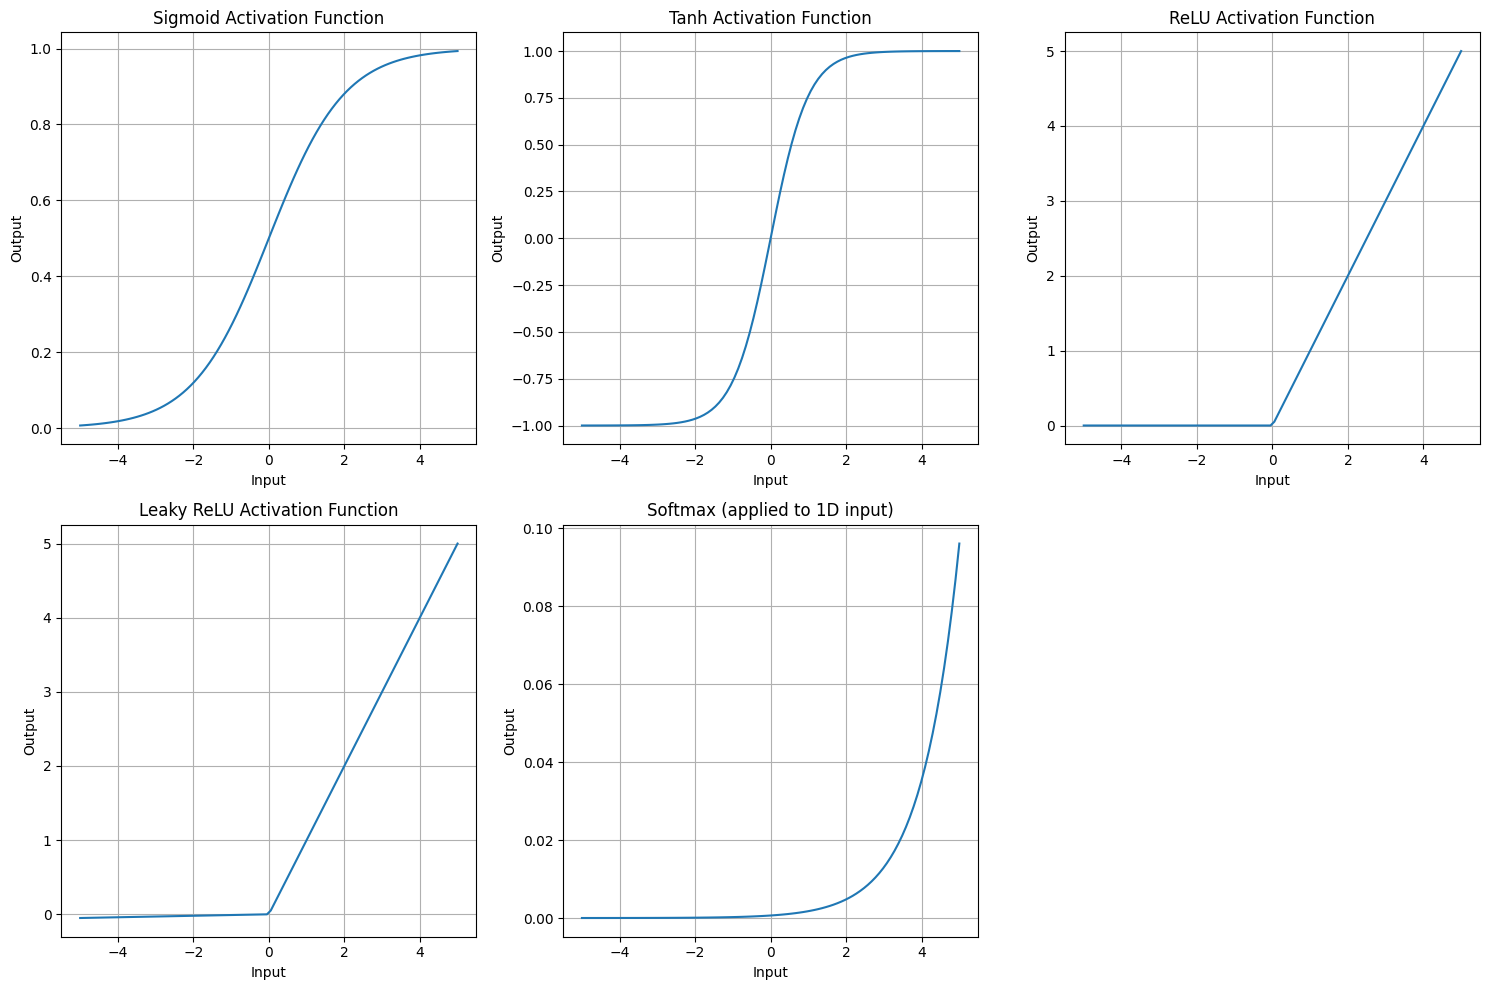

In [8]:
# Create input values from -5 to 5
x_values = np.linspace(-5, 5, 100)

# Calculate outputs for each activation function
sigmoid_y = sigmoid(x_values)
tanh_y = tanh(x_values)
relu_y = relu(x_values)
leaky_relu_y = leaky_relu(x_values)
# Softmax is typically applied to a vector representing outputs of a layer,
# but for visualization purposes of its shape, we can apply it to the 1D input array.
# Note: This isn't how it's used in practice for a single input node, but shows the characteristic curve.
softmax_y = softmax(x_values)


# Plot each activation function
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.plot(x_values, sigmoid_y)
plt.title('Sigmoid Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(x_values, tanh_y)
plt.title('Tanh Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(x_values, relu_y)
plt.title('ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(x_values, leaky_relu_y)
plt.title('Leaky ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(x_values, softmax_y)
plt.title('Softmax (applied to 1D input)')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)

plt.tight_layout()
plt.show()

## Explain activation functions

### Subtask:
Write a brief explanation of how the choice of activation function can affect learning in a neural network.


**Reasoning**:
Write the explanation in the designated markdown cell.



###Explanation (3–4 sentences):
* The choice of activation function significantly impacts a neural network's ability to learn complex patterns.
* Non-linear activation functions, unlike linear ones, allow the network to model non-linear relationships in the data, which is crucial for solving non-trivial problems.
* Different activation functions have varying impacts on gradient flow during backpropagation; for example, Sigmoid and Tanh can suffer from vanishing gradients, while ReLU and its variants help mitigate this issue for positive inputs.
* The final layer's activation function is often chosen based on the task type, such as Softmax for multi-class classification to produce probability distributions.